# <center> Python for Data Analysis</center>
### <center> Session 1b </center>

In [1]:
%%HTML
<style>
td,th {
  font-size: 20px
}
</style>


## <font color=green>Table of Contents</font>
- Quick Introduction to Pandas
- DataFrame and Series  
    - Series
    - DataFrame
- Loading Files
    - The NYC flights Dataset
- Getting a quick look at your data
- [Filtering a DataFrame](#filtering)
- [Sorting](#sort)
- [Selecting Multiple columns](#select)
- [Renaming columns](#rename)
- [Rearranging columns](#rearrange)
- [Creating new columns](#creating)
- Grouping in Pandas
- Merging in Pandas
- The Axis parameter
- The Apply Function
- Working with Null Values
- Reshaping/Pivoting

In [2]:
import pandas as pd
import numpy as np
import re
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn.objects as so
alt.data_transformers.disable_max_rows()
import matplotlib.pyplot as plt
print(f"Pandas:{pd.__version__}")
print(f"Altair:{alt.__version__}")
print(f"numpy:{np.__version__}")
print(f"seaborn:{sns.__version__}")

Pandas:2.1.4
Altair:5.2.0
numpy:1.23.5
seaborn:0.12.2


In [3]:
flights=pd.read_csv("https://github.com/niradsp/Python-for-Data-Analysis/raw/main/flights.csv.gz",compression="gzip",index_col=0)

# <a id="filtering"><b> Filtering DataFrame </b></a>  

Let's say that we want to filter for all datasets departing in January.  How can we do that? 
We need to first learn how to select just the 'month' column.  The way to do this is by using the variable name (flights in our case), followed by the column name (month in our case)

In [4]:
flights['month']

0         1
1         1
2         1
3         1
4         1
         ..
336771    9
336772    9
336773    9
336774    9
336775    9
Name: month, Length: 336776, dtype: int64

The dtype appears to be int64.  If you want to know the datatype of an individual column, you can use the <b> dtype </b> attribute.

In [5]:
flights['month'].dtype

dtype('int64')

What if you want to know datatype of all columns?
The <b> info </b> method already gave us this answer.  However, there is another way. 

You can instead use <b> dtypes</b>.

In [6]:
flights.dtypes

year                int64
month               int64
day                 int64
dep_time          float64
sched_dep_time      int64
dep_delay         float64
arr_time          float64
sched_arr_time      int64
arr_delay         float64
carrier            object
flight              int64
tailnum            object
origin             object
dest               object
air_time          float64
distance            int64
hour                int64
minute              int64
time_hour          object
dtype: object

Sometimes, you may want to convert from one datatype to another.  For that, you can use the <b> astype() </b>.  As an example, converting from 64-bit to 32-bit will possibly use less memory.

In [7]:
flights['year'].astype("int32")

0         2013
1         2013
2         2013
3         2013
4         2013
          ... 
336771    2013
336772    2013
336773    2013
336774    2013
336775    2013
Name: year, Length: 336776, dtype: int32

And as you recall, the dep_time column got loaded as a <b> float</b>:

In [8]:
flights['dep_time'].dtype

dtype('float64')

In [9]:
print(f"Before: {flights['dep_time'][1]}.  After:  {flights['dep_time'].astype('Int64')[1]}")

Before: 533.0.  After:  533


Anyway, back to flights.  Let's look at the data quickly.

In [10]:
flights

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,1/1/2013 5:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,1/1/2013 5:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,1/1/2013 5:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,1/1/2013 5:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,1/1/2013 6:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,9E,3393,NaN,JFK,DCA,NaN,213,14,55,9/30/2013 14:00
336772,2013,9,30,NaN,2200,NaN,NaN,2312,NaN,9E,3525,NaN,LGA,SYR,NaN,198,22,0,9/30/2013 22:00
336773,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,3461,N535MQ,LGA,BNA,NaN,764,12,10,9/30/2013 12:00
336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,MQ,3572,N511MQ,LGA,CLE,NaN,419,11,59,9/30/2013 11:00


Is it really true that the month is going from 1 to 9?  Shouldn't there be 12?  Let's verify.

First, we are going to use the <b> nunique()</b> method to count the number of unique values in month.

In [11]:
flights['month'].nunique()

12

It appears that there are indeed 12 unique months.  The data is not ordered by the month column.
Let's use the unique() method to look at all unique value in the month column.

In [12]:
flights['month'].unique()

array([ 1, 10, 11, 12,  2,  3,  4,  5,  6,  7,  8,  9], dtype=int64)

Now, let's look at the total count of each month in the month column by using <b>value_counts()</b>.  Note that value_counts() is used to count the number of occurences of factors. 

In [13]:
flights['month'].value_counts()

month
7     29425
8     29327
10    28889
3     28834
5     28796
4     28330
6     28243
12    28135
9     27574
11    27268
1     27004
2     24951
Name: count, dtype: int64

Pandas also allows you to quickly create plots.  As an example, below is the barplot.
Pandas plots are for <b> Exploratory Data Analysis </b>, and they are not necessarily publication quality.

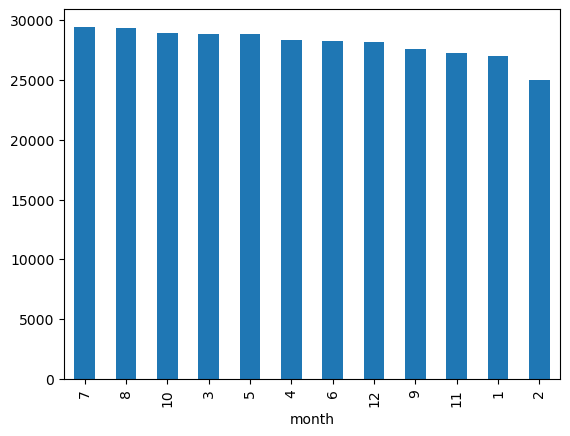

In [14]:
flights['month'].value_counts(normalize=False,sort=True,ascending=False).plot.bar()
plt.show()

You can use the "." notation to chain multiple commands together.  In the example above, I first called value_counts() to get the count() of each row, and then following this, I ran  plot.bar() to plot the counts.

The above value_counts parameters are default.  We can try to normalize the data (relative frequency), and set ascending to True to get the following figure.

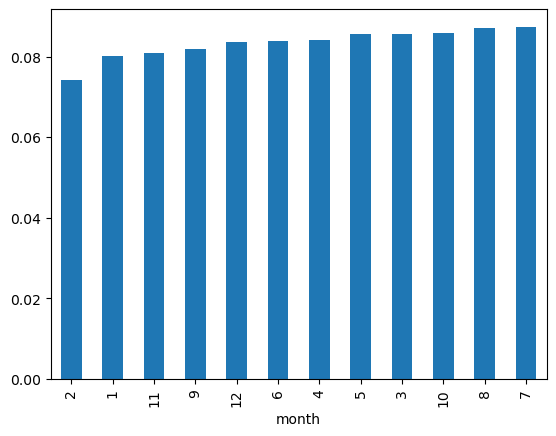

In [15]:
flights['month'].value_counts(normalize=True,ascending=True,).plot.bar()
plt.show()

Note that for continuous data, you can use the <b>hist() </b> method. As an example, the arrival delay columns is continuous data.

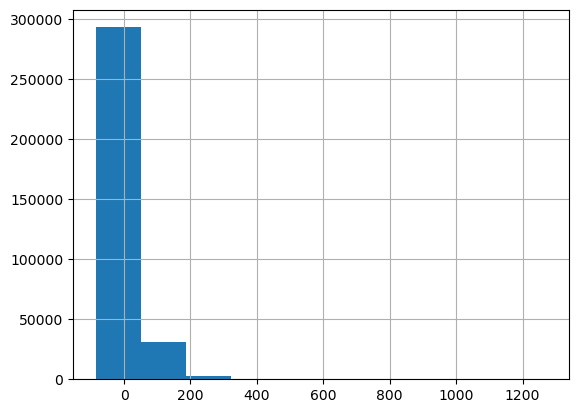

In [16]:
flights.arr_delay.hist(bins=10)
plt.show()

We already know that there are <b> NULL </b> values in the dataset.

However, you can also use the <b> isna()</b> method to look for Null values in the DataFrame. The isna() method returns boolean data.

Note that  you can use the dot notation even for the column!

In [17]:
flights.dep_time.isna()

0         False
1         False
2         False
3         False
4         False
          ...  
336771     True
336772     True
336773     True
336774     True
336775     True
Name: dep_time, Length: 336776, dtype: bool

If you want to drop rows with null values, the <b> dropna()</b> method is quite handy.  

In [18]:
flights.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Index: 327346 entries, 0 to 336769
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            327346 non-null  int64  
 1   month           327346 non-null  int64  
 2   day             327346 non-null  int64  
 3   dep_time        327346 non-null  float64
 4   sched_dep_time  327346 non-null  int64  
 5   dep_delay       327346 non-null  float64
 6   arr_time        327346 non-null  float64
 7   sched_arr_time  327346 non-null  int64  
 8   arr_delay       327346 non-null  float64
 9   carrier         327346 non-null  object 
 10  flight          327346 non-null  int64  
 11  tailnum         327346 non-null  object 
 12  origin          327346 non-null  object 
 13  dest            327346 non-null  object 
 14  air_time        327346 non-null  float64
 15  distance        327346 non-null  int64  
 16  hour            327346 non-null  int64  
 17  minute         

Let's say that we want to filter by month.  Furthermore, let's suppose that we are only interested in <b>January</b>.  
We can use an approach that is called <b> masking </b>  
The variable is a list of boolean(True/False) data.

In [19]:
condition=flights['month']==1

You use the "==" key to return True or False. Let's look at what the condition variable looks like.

In [20]:
condition

0          True
1          True
2          True
3          True
4          True
          ...  
336771    False
336772    False
336773    False
336774    False
336775    False
Name: month, Length: 336776, dtype: bool

Using square brackets, we can now keep only those rows, where condition is True (i.e. January)

In [21]:
Jan_only=flights[condition]
Jan_only.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,1/1/2013 5:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,1/1/2013 5:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,1/1/2013 5:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,1/1/2013 5:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,1/1/2013 6:00


Let's count uniques in the month column.  This should have just 1 unique value (January).

In [22]:
Jan_only.month.unique()

array([1], dtype=int64)

How many rows are there in January.

In [23]:
Jan_only.shape

(27004, 19)

The second approach for filtering is by using the  <b>query()</b> method.  
The query() method accepts a conditional within the parentheses.

In [24]:
flights.query("month==1")

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,1/1/2013 5:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,1/1/2013 5:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,1/1/2013 5:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,1/1/2013 5:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,1/1/2013 6:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26999,2013,1,31,NaN,1325,NaN,NaN,1505,NaN,MQ,4475,N730MQ,LGA,RDU,NaN,431,13,25,1/31/2013 13:00
27000,2013,1,31,NaN,1200,NaN,NaN,1430,NaN,MQ,4658,N505MQ,LGA,ATL,NaN,762,12,0,1/31/2013 12:00
27001,2013,1,31,NaN,1410,NaN,NaN,1555,NaN,MQ,4491,N734MQ,LGA,CLE,NaN,419,14,10,1/31/2013 14:00
27002,2013,1,31,NaN,1446,NaN,NaN,1757,NaN,UA,337,NaN,LGA,IAH,NaN,1416,14,46,1/31/2013 14:00


Now let's try filtering the data based on 2 conditional arguments. First, we try this using the mask.

Let's say that we want to filter for all datasets departing on January 1 (month=1 and day=1).  Here is how to do this. We use the "&" keyword.  Note that each condition needs to have its own parenthesis. 

In [25]:
condition=(flights['month']==1)&(flights['day']==1)
flights[condition].tail(n=3)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
839,2013,1,1,NaN,1935,NaN,NaN,2240,NaN,AA,791,N3EHAA,LGA,DFW,NaN,1389,19,35,1/1/2013 19:00
840,2013,1,1,NaN,1500,NaN,NaN,1825,NaN,AA,1925,N3EVAA,LGA,MIA,NaN,1096,15,0,1/1/2013 15:00
841,2013,1,1,NaN,600,NaN,NaN,901,NaN,B6,125,N618JB,JFK,FLL,NaN,1069,6,0,1/1/2013 6:00


The same task, but using query() is as follows:

In [26]:
flights.query("month==1 & day==1").head(3)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,1/1/2013 5:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,1/1/2013 5:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,1/1/2013 5:00


Let's save this data to a new variable.

In [27]:
jan1=flights[condition]

In the example above, the conditional is an "&" operation, meaning that we require month of 1 (January" and day of 1 (i.e. January 1).  We can also do an <b>OR </b> operation. Let's say that we want to extract all deparatures in November or December.

In [28]:
condition=(flights['month']==11)|(flights['month']==12)
flights[condition].tail(3)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
111293,2013,12,31,NaN,1615,NaN,NaN,1800,NaN,MQ,3301,N844MQ,LGA,RDU,NaN,431,16,15,12/31/2013 16:00
111294,2013,12,31,NaN,600,NaN,NaN,735,NaN,UA,219,NaN,EWR,ORD,NaN,719,6,0,12/31/2013 6:00
111295,2013,12,31,NaN,830,NaN,NaN,1154,NaN,UA,443,NaN,JFK,LAX,NaN,2475,8,30,12/31/2013 8:00


Here is how we do this exact same thing using query():

In [29]:
flights.query("month==11|month==12").head(3)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
55893,2013,11,1,5.0,2359,6.0,352.0,345,7.0,B6,745,N568JB,JFK,PSE,205.0,1617,23,59,11/1/2013 23:00
55894,2013,11,1,35.0,2250,105.0,123.0,2356,87.0,B6,1816,N353JB,JFK,SYR,36.0,209,22,50,11/1/2013 22:00
55895,2013,11,1,455.0,500,-5.0,641.0,651,-10.0,US,1895,N192UW,EWR,CLT,88.0,529,5,0,11/1/2013 5:00


You can also use the "isin" method with a list as follows.  Notice that the shape(number of rows and columns) is the same as the output above. The isin() function is similar to "%in%" in R.

In [30]:
condition=flights['month'].isin([11,12])
flights[condition].head(3)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
55893,2013,11,1,5.0,2359,6.0,352.0,345,7.0,B6,745,N568JB,JFK,PSE,205.0,1617,23,59,11/1/2013 23:00
55894,2013,11,1,35.0,2250,105.0,123.0,2356,87.0,B6,1816,N353JB,JFK,SYR,36.0,209,22,50,11/1/2013 22:00
55895,2013,11,1,455.0,500,-5.0,641.0,651,-10.0,US,1895,N192UW,EWR,CLT,88.0,529,5,0,11/1/2013 5:00


Using query(), we instead use the "in" keyword along with the list of interest.

In [31]:
flights.query("month in [11,12]")

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
55893,2013,11,1,5.0,2359,6.0,352.0,345,7.0,B6,745,N568JB,JFK,PSE,205.0,1617,23,59,11/1/2013 23:00
55894,2013,11,1,35.0,2250,105.0,123.0,2356,87.0,B6,1816,N353JB,JFK,SYR,36.0,209,22,50,11/1/2013 22:00
55895,2013,11,1,455.0,500,-5.0,641.0,651,-10.0,US,1895,N192UW,EWR,CLT,88.0,529,5,0,11/1/2013 5:00
55896,2013,11,1,539.0,545,-6.0,856.0,827,29.0,UA,1714,N38727,LGA,IAH,229.0,1416,5,45,11/1/2013 5:00
55897,2013,11,1,542.0,545,-3.0,831.0,855,-24.0,AA,2243,N5CLAA,JFK,MIA,147.0,1089,5,45,11/1/2013 5:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111291,2013,12,31,NaN,705,NaN,NaN,931,NaN,UA,1729,NaN,EWR,DEN,NaN,1605,7,5,12/31/2013 7:00
111292,2013,12,31,NaN,825,NaN,NaN,1029,NaN,US,1831,NaN,JFK,CLT,NaN,541,8,25,12/31/2013 8:00
111293,2013,12,31,NaN,1615,NaN,NaN,1800,NaN,MQ,3301,N844MQ,LGA,RDU,NaN,431,16,15,12/31/2013 16:00
111294,2013,12,31,NaN,600,NaN,NaN,735,NaN,UA,219,NaN,EWR,ORD,NaN,719,6,0,12/31/2013 6:00


 How about using ">" and "<" to filter for data?  As an example,finding flights that weren't delayed on both arrival and  departure by more than 120 minutes can be achived as follows:

In [32]:
condition=(flights['arr_delay']<120)&(flights['dep_delay']<120)
flights[condition]

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,1/1/2013 5:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,1/1/2013 5:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,1/1/2013 5:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,1/1/2013 5:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,1/1/2013 6:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336765,2013,9,30,2240.0,2245,-5.0,2334.0,2351,-17.0,B6,1816,N354JB,JFK,SYR,41.0,209,22,45,9/30/2013 22:00
336766,2013,9,30,2240.0,2250,-10.0,2347.0,7,-20.0,B6,2002,N281JB,JFK,BUF,52.0,301,22,50,9/30/2013 22:00
336767,2013,9,30,2241.0,2246,-5.0,2345.0,1,-16.0,B6,486,N346JB,JFK,ROC,47.0,264,22,46,9/30/2013 22:00
336768,2013,9,30,2307.0,2255,12.0,2359.0,2358,1.0,B6,718,N565JB,JFK,BOS,33.0,187,22,55,9/30/2013 22:00


And the same task using query()

In [33]:
flights.query("dep_delay<120 & arr_delay<120")

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,1/1/2013 5:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,1/1/2013 5:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,1/1/2013 5:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,1/1/2013 5:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,1/1/2013 6:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336765,2013,9,30,2240.0,2245,-5.0,2334.0,2351,-17.0,B6,1816,N354JB,JFK,SYR,41.0,209,22,45,9/30/2013 22:00
336766,2013,9,30,2240.0,2250,-10.0,2347.0,7,-20.0,B6,2002,N281JB,JFK,BUF,52.0,301,22,50,9/30/2013 22:00
336767,2013,9,30,2241.0,2246,-5.0,2345.0,1,-16.0,B6,486,N346JB,JFK,ROC,47.0,264,22,46,9/30/2013 22:00
336768,2013,9,30,2307.0,2255,12.0,2359.0,2358,1.0,B6,718,N565JB,JFK,BOS,33.0,187,22,55,9/30/2013 22:00


With the filtering above, the dep_delay and arr_delay columns should be less than 120 (maximum of 119).
Here we can use max() on dep_delay to find the maximum.  We first filter based on the condition.

In [34]:
flights[condition].dep_delay.max()

119.0

In [35]:
flights[condition].arr_delay.max()

119.0

We can use "<=" instead of "<" to include 120. Also, instead of storing the condition to a variable called "condition", we can include the operation within square brackets of the flights[] object directly.


In [36]:
flights[(flights['dep_delay']<=120) & (flights['arr_delay']<=120)].head(3)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,1/1/2013 5:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,1/1/2013 5:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,1/1/2013 5:00


And using <b> <= </b> instead of <b> < </b> will have 120 as the maximum.

In [37]:
flights[(flights['dep_delay']<=120) & (flights['arr_delay']<=120)].arr_delay.max()

120.0

Pandas also allows you to filter your data based on partial string matches.  
Here I am filtering for all destinations <b> starting</b> with BW.

In [56]:
flights[flights['dest'].str.startswith("BW")].head(n=3)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
39,2013,1,1,629.0,630,-1.0,721.0,740,-19.0,WN,4646,N273WN,LGA,BWI,40.0,185,6,30,1/1/2013 6:00
151,2013,1,1,848.0,1835,853.0,1001.0,1950,851.0,MQ,3944,N942MQ,JFK,BWI,41.0,184,18,35,1/1/2013 18:00
257,2013,1,1,1059.0,1100,-1.0,1201.0,1215,-14.0,WN,321,N505SW,LGA,BWI,43.0,185,11,0,1/1/2013 11:00


Here I am filtering for all destinations <b> ending</b> with "W".

In [57]:
flights[flights['dest'].str.endswith("W")].head(n=3)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
14,2013,1,1,559.0,600,-1.0,941.0,910,31.0,AA,707,N3DUAA,LGA,DFW,257.0,1389,6,0,1/1/2013 6:00
21,2013,1,1,602.0,605,-3.0,821.0,805,16.0,MQ,4401,N730MQ,LGA,DTW,105.0,502,6,5,1/1/2013 6:00
27,2013,1,1,613.0,610,3.0,925.0,921,4.0,B6,135,N635JB,JFK,RSW,175.0,1074,6,10,1/1/2013 6:00


Finally, here I am filtering for all destinations <b> containing</b> the letter "U".

In [58]:
flights[flights['dest'].str.contains("U")].head(n=3)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
28,2013,1,1,615.0,615,0.0,1039.0,1100,-21.0,B6,709,N794JB,JFK,SJU,182.0,1598,6,15,1/1/2013 6:00
36,2013,1,1,628.0,630,-2.0,1137.0,1140,-3.0,AA,413,N3BAAA,JFK,SJU,192.0,1598,6,30,1/1/2013 6:00
48,2013,1,1,645.0,647,-2.0,815.0,810,5.0,B6,102,N796JB,JFK,BUF,63.0,301,6,47,1/1/2013 6:00


# <a id="sort"> Sorting Values </a>
The sort_values() function can be used to sort values in a DataFrame.  
Remember that the month column was not sorted from 1-12?  

In [38]:
flights.sort_values('month').tail(n=3)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
92531,2013,12,11,620.0,630,-10.0,940.0,938,2.0,B6,929,N595JB,JFK,RSW,179.0,1074,6,30,12/11/2013 6:00
92542,2013,12,11,631.0,635,-4.0,948.0,943,5.0,UA,1299,N17229,EWR,RSW,179.0,1068,6,35,12/11/2013 6:00
109119,2013,12,29,1455.0,1500,-5.0,1658.0,1656,2.0,US,721,N174US,EWR,CLT,96.0,529,15,0,12/29/2013 15:00


By default, the values are sorted in ascending order (1 to 12).  We can also sort by descending order, with January being on the bottom.

In [42]:
flights.sort_values('month',ascending=False).tail(n=3)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
18009,2013,1,21,1754.0,1800,-6.0,1903.0,1915,-12.0,B6,1016,N184JB,JFK,BOS,44.0,187,18,0,1/21/2013 18:00
18010,2013,1,21,1755.0,1800,-5.0,2015.0,2006,9.0,US,373,N657AW,JFK,CLT,99.0,541,18,0,1/21/2013 18:00
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,1/1/2013 5:00


In the example below, we are sorting by 3 different columns: year, month and day in that order.

In [43]:
flights.sort_values(['year','month','day']).tail(n=3)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
111293,2013,12,31,NaN,1615,NaN,NaN,1800,NaN,MQ,3301,N844MQ,LGA,RDU,NaN,431,16,15,12/31/2013 16:00
111294,2013,12,31,NaN,600,NaN,NaN,735,NaN,UA,219,NaN,EWR,ORD,NaN,719,6,0,12/31/2013 6:00
111295,2013,12,31,NaN,830,NaN,NaN,1154,NaN,UA,443,NaN,JFK,LAX,NaN,2475,8,30,12/31/2013 8:00


We can also sort by descending order.  Notice that the largest value of dep_delay (or departure delay) is on the top.  
Also, missing values are on the bottom of the dep_delay column.

In [44]:
flights.sort_values("dep_delay",ascending=False)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
7072,2013,1,9,641.0,900,1301.0,1242.0,1530,1272.0,HA,51,N384HA,JFK,HNL,640.0,4983,9,0,1/9/2013 9:00
235778,2013,6,15,1432.0,1935,1137.0,1607.0,2120,1127.0,MQ,3535,N504MQ,JFK,CMH,74.0,483,19,35,6/15/2013 19:00
8239,2013,1,10,1121.0,1635,1126.0,1239.0,1810,1109.0,MQ,3695,N517MQ,EWR,ORD,111.0,719,16,35,1/10/2013 16:00
327043,2013,9,20,1139.0,1845,1014.0,1457.0,2210,1007.0,AA,177,N338AA,JFK,SFO,354.0,2586,18,45,9/20/2013 18:00
270376,2013,7,22,845.0,1600,1005.0,1044.0,1815,989.0,MQ,3075,N665MQ,JFK,CVG,96.0,589,16,0,7/22/2013 16:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,9E,3393,NaN,JFK,DCA,NaN,213,14,55,9/30/2013 14:00
336772,2013,9,30,NaN,2200,NaN,NaN,2312,NaN,9E,3525,NaN,LGA,SYR,NaN,198,22,0,9/30/2013 22:00
336773,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,3461,N535MQ,LGA,BNA,NaN,764,12,10,9/30/2013 12:00
336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,MQ,3572,N511MQ,LGA,CLE,NaN,419,11,59,9/30/2013 11:00


# <a id="select"> Selecting multiple Columns </a>
I showed you how to select a single column.  To select multiple columns we can pass a list.

In [45]:
cols_of_interest=['year','month','day']
flights[cols_of_interest]

,year,month,day
0,2013,1,1
1,2013,1,1
2,2013,1,1
3,2013,1,1
4,2013,1,1
...,...,...,...
336771,2013,9,30
336772,2013,9,30
336773,2013,9,30
336774,2013,9,30


The other method is by using the <b> filter()</b> method.

In [46]:
flights.filter(items=['month','year','day'])

,month,year,day
0,1,2013,1
1,1,2013,1
2,1,2013,1
3,1,2013,1
4,1,2013,1
...,...,...,...
336771,9,2013,30
336772,9,2013,30
336773,9,2013,30
336774,9,2013,30


Indeed, if you switch the column order, that is how the data will be selected.

In [47]:
cols_of_interest=['month','year','day']
flights[cols_of_interest]

,month,year,day
0,1,2013,1
1,1,2013,1
2,1,2013,1
3,1,2013,1
4,1,2013,1
...,...,...,...
336771,9,2013,30
336772,9,2013,30
336773,9,2013,30
336774,9,2013,30


You can also select columns by using the <b> slicing </b> method.
Slicing is a method you use to select a range of data.

In [48]:
flights.head(3)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,1/1/2013 5:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,1/1/2013 5:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,1/1/2013 5:00


In [49]:
flights[flights.columns[0:3]].head()

,year,month,day
0,2013,1,1
1,2013,1,1
2,2013,1,1
3,2013,1,1
4,2013,1,1


There is also .loc[] that can be used. You can use this to select based on the labels, or rows.  

In [50]:
flights.loc[0:3,['year','month','day']]

,year,month,day
0,2013,1,1
1,2013,1,1
2,2013,1,1
3,2013,1,1


<div class="alert alert-info"> Alert: The loc[] method selects all labels from 0 to 3.  The 3 is not excluded. </div>
Here, I am selecting the labels 0 to 3. Next, I am filtering for year, month and day columns.

In [51]:
flights.loc[0:3].filter(items=['year','month','day'])

,year,month,day
0,2013,1,1
1,2013,1,1
2,2013,1,1
3,2013,1,1


You can use iloc for selecting based on the index. Here I also subset the row to select the top 3 rows.

In [52]:
flights.iloc[0:3:,0:3]

,year,month,day
0,2013,1,1
1,2013,1,1
2,2013,1,1


<div class="alert alert-info"> Alert:  The iloc[] method excluded 3.  This is different from .loc[] </div>


What if we want to select all columns starting with "dep"?


We can do this by using list comprehension.  
List comprehension is a way of  processing lists.  
We use the <b> .startswith() </b> method on the columns data to then filter for columns that start with "dep".

In [53]:
condition=[col for col in flights.columns if col.startswith("dep")]
flights[condition].head()

,dep_time,dep_delay
0,517.0,2.0
1,533.0,4.0
2,542.0,2.0
3,544.0,-1.0
4,554.0,-6.0


The <b> filter() </b> method accepts a keyword called <b> regex </b> which you can use to select columns.  
The <b> ^</b> character is a special regular expression character that allows you to match the beginning of a string.

In [54]:
flights.filter(regex="^dep").head()

,dep_time,dep_delay
0,517.0,2.0
1,533.0,4.0
2,542.0,2.0
3,544.0,-1.0
4,554.0,-6.0


Similarly, let's select those columns ending with "delay".  
Here, instead of startswith(), we use endswith() to select columns ending with "delay".

In [55]:
condition=[col for col in flights.columns if col.endswith("delay")]
flights[condition].head()

,dep_delay,arr_delay
0,2.0,11.0
1,4.0,20.0
2,2.0,33.0
3,-1.0,-18.0
4,-6.0,-25.0


You can also use the <b>filter()</b> method to select columns ending in delay using the regular expression parameter.

Here, the <b> $ </b> parameter tell you to match the end of a string (in this case the end of column names).

The "$" matches end of a string, while "^" matches beginning of a string.

In [56]:
flights.filter(regex="delay$").head()

,dep_delay,arr_delay
0,2.0,11.0
1,4.0,20.0
2,2.0,33.0
3,-1.0,-18.0
4,-6.0,-25.0


In the example below, we are selecting columns that either ends with "delay" or "time" by using "list comprehension".

In [57]:
condition=[col for col in flights.columns if col.endswith("delay") or col.endswith("time")]
flights[condition]

,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,air_time
0,517.0,515,2.0,830.0,819,11.0,227.0
1,533.0,529,4.0,850.0,830,20.0,227.0
2,542.0,540,2.0,923.0,850,33.0,160.0
3,544.0,545,-1.0,1004.0,1022,-18.0,183.0
4,554.0,600,-6.0,812.0,837,-25.0,116.0
...,...,...,...,...,...,...,...
336771,NaN,1455,NaN,NaN,1634,NaN,NaN
336772,NaN,2200,NaN,NaN,2312,NaN,NaN
336773,NaN,1210,NaN,NaN,1330,NaN,NaN
336774,NaN,1159,NaN,NaN,1344,NaN,NaN


This can also be done using the <b> filter </b> method.

In [58]:
flights.filter(regex="delay$|time$")

,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,air_time
0,517.0,515,2.0,830.0,819,11.0,227.0
1,533.0,529,4.0,850.0,830,20.0,227.0
2,542.0,540,2.0,923.0,850,33.0,160.0
3,544.0,545,-1.0,1004.0,1022,-18.0,183.0
4,554.0,600,-6.0,812.0,837,-25.0,116.0
...,...,...,...,...,...,...,...
336771,NaN,1455,NaN,NaN,1634,NaN,NaN
336772,NaN,2200,NaN,NaN,2312,NaN,NaN
336773,NaN,1210,NaN,NaN,1330,NaN,NaN
336774,NaN,1159,NaN,NaN,1344,NaN,NaN


In this example, we are selecting all columns that contain <b> dep</b>.  It does not matter if it is in the beginning, the middle or the end.  We just want to match the word "dep".

In [59]:
flights[[col for col in flights.columns if "dep" in col]].head()

,dep_time,sched_dep_time,dep_delay
0,517.0,515,2.0
1,533.0,529,4.0
2,542.0,540,2.0
3,544.0,545,-1.0
4,554.0,600,-6.0


Similarly, by using filter(). 
All you need to do is not include <b>$ </b> or <b> ^ </b>

In [60]:
flights.filter(regex="dep")

,dep_time,sched_dep_time,dep_delay
0,517.0,515,2.0
1,533.0,529,4.0
2,542.0,540,2.0
3,544.0,545,-1.0
4,554.0,600,-6.0
...,...,...,...
336771,NaN,1455,NaN
336772,NaN,2200,NaN
336773,NaN,1210,NaN
336774,NaN,1159,NaN


# <a id="rename"> Renaming columns</a>

Here is an example of how to rename a column.
You need to use the rename function, and pass a dictionary key-value pair to the "columns" parameter.  
Below, I use head() to display only the top rows.

In [62]:
flights.rename(columns={"tailnum":"tail_num"}).head(n=2)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tail_num,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,1/1/2013 5:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,1/1/2013 5:00


Note that there is also the <b> inplace=True </b> parameter.  With this parameter, you do not need to create a new dataframe.  Our original dataframe is modified. 
To demonstrate this, I will create a new variable called flights2 that has just the first 10 rows.

In [63]:
flights2=flights.iloc[0:10].copy()
flights2.head(3)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,1/1/2013 5:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,1/1/2013 5:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,1/1/2013 5:00


In [64]:
flights2.rename(columns={"dep_delay":"departure_delay"},inplace=True)

In [65]:
flights2.head()

,year,month,day,dep_time,sched_dep_time,departure_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,1/1/2013 5:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,1/1/2013 5:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,1/1/2013 5:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,1/1/2013 5:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,1/1/2013 6:00


# <a id="rearrange"> Rearranging Columns </a>
Here are all of the flights columns.

In [66]:
flights.columns

Index(['year', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay',
       'arr_time', 'sched_arr_time', 'arr_delay', 'carrier', 'flight',
       'tailnum', 'origin', 'dest', 'air_time', 'distance', 'hour', 'minute',
       'time_hour'],
      dtype='object')

How about arranging the columns so that all columns containing "dep" are in the beginning of the columns?

In [67]:
cols=[col for col in flights.columns if "dep" in col]+[col for col in flights.columns if "dep" not in col]
flights[cols].head()

,dep_time,sched_dep_time,dep_delay,year,month,day,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,517.0,515,2.0,2013,1,1,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,1/1/2013 5:00
1,533.0,529,4.0,2013,1,1,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,1/1/2013 5:00
2,542.0,540,2.0,2013,1,1,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,1/1/2013 5:00
3,544.0,545,-1.0,2013,1,1,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,1/1/2013 5:00
4,554.0,600,-6.0,2013,1,1,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,1/1/2013 6:00


# <a id="creating"> Creating new columns.  </a>

This can be done the following way.  We will work with a smaller dataset by creating a new dataframe called <b> flights_sml </b>  
We use the .copy() method so that when we modify the slice, it will not change the bigger dataset.

Note that you can <b> extend</b> multiple lists by using "+"

In [68]:
columns_of_interest=['year','month','day']+[col for col in flights.columns if col.endswith("delay")]+['distance']+['air_time']
flights_sml=flights[columns_of_interest].copy()

The "gain" column will be positive if departure delay >arrival delay.  In other words, you are not delayed as much anymore.
Speed is just distance/time.

In [69]:
flights_sml.loc[:,'gain']=flights_sml.dep_delay-flights_sml.arr_delay
flights_sml.loc[:,'speed']=(flights_sml.distance/flights_sml.air_time)*60

In [70]:
flights_sml.head(6)

,year,month,day,dep_delay,arr_delay,distance,air_time,gain,speed
0,2013,1,1,2.0,11.0,1400,227.0,-9.0,370.044053
1,2013,1,1,4.0,20.0,1416,227.0,-16.0,374.273128
2,2013,1,1,2.0,33.0,1089,160.0,-31.0,408.375000
3,2013,1,1,-1.0,-18.0,1576,183.0,17.0,516.721311
4,2013,1,1,-6.0,-25.0,762,116.0,19.0,394.137931
5,2013,1,1,-4.0,12.0,719,150.0,-16.0,287.600000
